# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
temp_units = "imperial"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
#         print(city_weather)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | taltal
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | zapolyarnyy
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | reyes
Processing Record 9 of Set 1 | tabou
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mahibadhoo
Processing Record 12 of Set 1 | camacha
Processing Record 13 of Set 1 | bentiu
Processing Record 14 of Set 1 | les cayes
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | cidreira
Processing Record 17 of Set 1 | zhob
Processing Record 18 of Set 1 | naze
Processing Record 19 of Set 1 | hambantota
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | inhambane
Processing Record 22 of Set 1 | kudahuvadhoo
Processing Record 23 of Set 1 | hoquiam
Processing Record

Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | santa luzia
Processing Record 43 of Set 4 | rochegda
Processing Record 44 of Set 4 | champerico
Processing Record 45 of Set 4 | seoul
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | castro
Processing Record 49 of Set 4 | santa lucia
Processing Record 0 of Set 5 | asau
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | shache
Processing Record 3 of Set 5 | khatanga
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | bukachacha
Processing Record 6 of Set 5 | jingcheng
Processing Record 7 of Set 5 | praia
Processing Record 8 of Set 5 | vestmannaeyjar
Processing Record 9 of Set 5 | worland
Processing Record 10 of Set 5 | nome
Processing Record 11 of Set 5 | salvador
Processing Record 12 of Set 5 | bambous virieux
Processing Record 13 of Set 5 | se

Processing Record 27 of Set 8 | ugoofaaru
Processing Record 28 of Set 8 | matagami
Processing Record 29 of Set 8 | ponta do sol
Processing Record 30 of Set 8 | namibe
Processing Record 31 of Set 8 | fatehpur
Processing Record 32 of Set 8 | kathmandu
Processing Record 33 of Set 8 | bandarbeyla
Processing Record 34 of Set 8 | dofteana
Processing Record 35 of Set 8 | aneho
Processing Record 36 of Set 8 | namatanai
Processing Record 37 of Set 8 | grootfontein
Processing Record 38 of Set 8 | kaka
Processing Record 39 of Set 8 | airai
Processing Record 40 of Set 8 | avera
Processing Record 41 of Set 8 | belaya gora
Processing Record 42 of Set 8 | yumen
Processing Record 43 of Set 8 | muscat
Processing Record 44 of Set 8 | kota belud
Processing Record 45 of Set 8 | mogadishu
Processing Record 46 of Set 8 | ialibu
Processing Record 47 of Set 8 | semnan
Processing Record 48 of Set 8 | coihaique
Processing Record 49 of Set 8 | saldanha
Processing Record 0 of Set 9 | rocha
Processing Record 1 of 

Processing Record 19 of Set 12 | port shepstone
Processing Record 20 of Set 12 | olinda
Processing Record 21 of Set 12 | hamilton
Processing Record 22 of Set 12 | luanda
Processing Record 23 of Set 12 | marsh harbour
Processing Record 24 of Set 12 | lashio
Processing Record 25 of Set 12 | basoko
Processing Record 26 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 27 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 28 of Set 12 | teguldet
Processing Record 29 of Set 12 | tabriz
Processing Record 30 of Set 12 | muros
Processing Record 31 of Set 12 | egvekinot
Processing Record 32 of Set 12 | pundaguitan
Processing Record 33 of Set 12 | sven
Processing Record 34 of Set 12 | solnechnyy
Processing Record 35 of Set 12 | hun
Processing Record 36 of Set 12 | bonavista
Processing Record 37 of Set 12 | nguiu
City not found. Skipping...
Processing Record 38 of Set 12 | medicine hat
Processing Record 39 of Set 12 | san vicente
Processing Record 40 of Set 12

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count

<bound method DataFrame.count of                City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0              chuy -33.6971  -53.4616    297.35        57           1   
1            taltal -25.4000  -70.4833    295.62        74          14   
2    ribeira grande  38.5167  -28.7000    290.25        88          20   
3       zapolyarnyy  69.4154   30.8136    257.75       100          61   
4            atuona  -9.8000 -139.0333    298.83        79          22   
..              ...      ...       ...       ...       ...         ...   
565            ayan  56.4500  138.1667    249.92        88          83   
566      bordighera  43.7806    7.6645    284.57        92           0   
567       road town  18.4167  -64.6167    300.20        76           0   
568          seddon -37.8068  144.8916    289.10        81          75   
569        ahuimanu  21.4447 -157.8378    295.57        90         100   

     Wind Speed Country        Date  
0          7.39      UY  1675540940  
1 

In [5]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chuy,-33.6971,-53.4616,297.35,57,1,7.39,UY,1675540940
1,taltal,-25.4000,-70.4833,295.62,74,14,1.60,CL,1675541130
2,ribeira grande,38.5167,-28.7000,290.25,88,20,4.92,PT,1675541131
3,zapolyarnyy,69.4154,30.8136,257.75,100,61,1.29,RU,1675541131
4,atuona,-9.8000,-139.0333,298.83,79,22,8.01,PF,1675540855
...,...,...,...,...,...,...,...,...,...
565,ayan,56.4500,138.1667,249.92,88,83,2.38,RU,1675541062
566,bordighera,43.7806,7.6645,284.57,92,0,1.34,IT,1675541388
567,road town,18.4167,-64.6167,300.20,76,0,8.80,VG,1675541326
568,seddon,-37.8068,144.8916,289.10,81,75,4.12,AU,1675541388


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chuy,-33.6971,-53.4616,297.35,57,1,7.39,UY,1675540940
1,taltal,-25.4000,-70.4833,295.62,74,14,1.60,CL,1675541130
2,ribeira grande,38.5167,-28.7000,290.25,88,20,4.92,PT,1675541131
3,zapolyarnyy,69.4154,30.8136,257.75,100,61,1.29,RU,1675541131
4,atuona,-9.8000,-139.0333,298.83,79,22,8.01,PF,1675540855


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The r-value is: 0.6069104260822961
y = -0.43x + 291.79


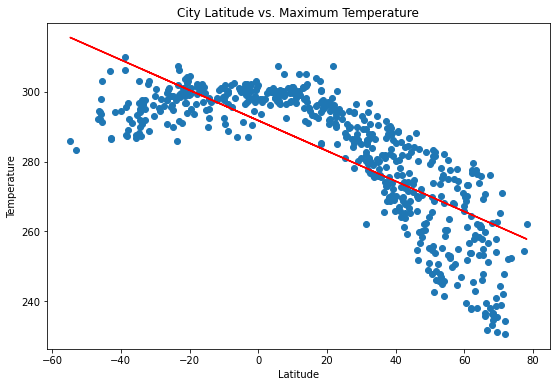

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The r-value is: 0.03282116132463541
y = 0.12x + 70.52


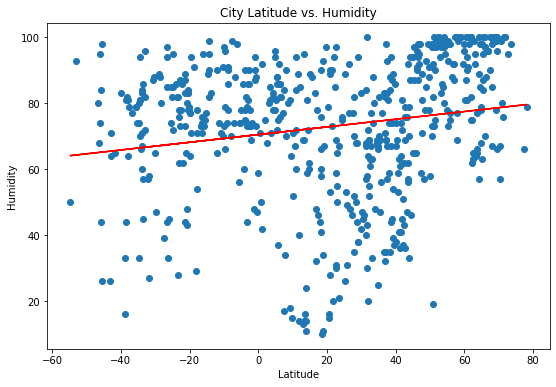

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The r-value is: 0.020740294732994134
y = 0.17x + 55.41


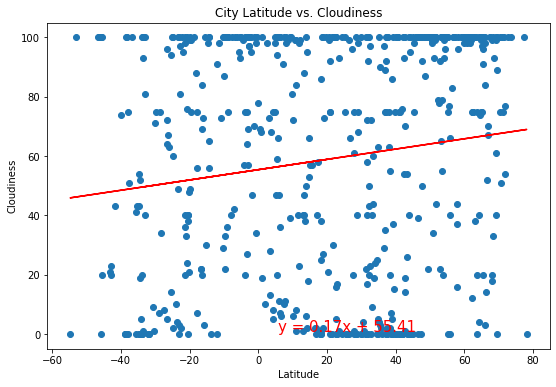

In [10]:
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The r-value is: 0.003922596670067339
y = -0.0x + 3.7


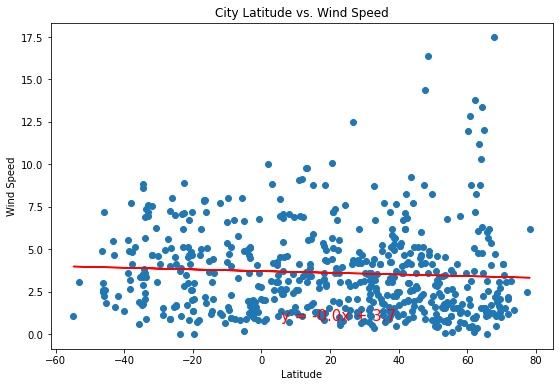

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,6))
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
linear_regression = (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ribeira grande,38.5167,-28.7000,290.25,88,20,4.92,PT,1675541131
3,zapolyarnyy,69.4154,30.8136,257.75,100,61,1.29,RU,1675541131
8,tabou,4.4230,-7.3528,299.90,83,5,4.08,CI,1675541132
10,mahibadhoo,3.7833,72.9667,300.00,71,68,2.04,MV,1675541133
11,camacha,33.0833,-16.3333,287.83,63,40,6.69,PT,1675540962


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]  0]

# Display sample data
southern_hemi_df.head()

SyntaxError: invalid syntax (683692324.py, line 2)

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Maximum Temperature vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Temperature")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig5.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

In [ ]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Max Temp"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Maximum Temperature vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Temperature")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig6.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Humidity"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Humidity(%) vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig7.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

In [ ]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Humidity"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Humidity(%) vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig8.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Cloudiness"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Cloudiness vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig9.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

In [ ]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Cloudiness"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Cloudiness vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig10.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df["Wind Speed"]
y_values = northern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Wind Speed vs. City Latitude (Northern Hemisphere)")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig11.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

In [ ]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df["Wind Speed"]
y_values = southern_hemi_df["Lat"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Wind Speed vs. City Latitude (Southern Hemisphere)")
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig12.png")

print(f"The r-value is: {rvalue**2}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE